# 1.*Load Data and Data Cleaning*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../dataset/Bank-customer-churn-prediction.csv")

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
# Data cleaning
df.drop("CustomerId", axis='columns', inplace=True)
df.drop("Surname", axis='columns', inplace=True)
df.drop("RowNumber", axis='columns', inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [4]:
df = df.join(pd.get_dummies(df['Geography'], prefix= 'Geo').astype('int'))
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [5]:
df.drop("Geography", axis='columns', inplace=True)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [6]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [7]:
df['Gender']= df['Gender'].astype('str').apply(lambda x: 1 if x=='Female' else 0)
df['Gender'].value_counts()

Gender
0    5457
1    4543
Name: count, dtype: int64

In [9]:
df.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,0,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,822,0,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,376,1,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,501,0,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,684,0,27,2,134603.88,1,1,1,71725.73,0,1,0,0


In [11]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geo_France', 'Geo_Germany', 'Geo_Spain'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int64  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
 10  Geo_France       10000 non-null  int32  
 11  Geo_Germany      10000 non-null  int32  
 12  Geo_Spain        10000 non-null  int32  
dtypes: float64(2), int32(3), int64(8)
memory usage: 898.6 KB


In [13]:
df= df[['CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geo_France', 'Geo_Germany', 'Geo_Spain', 'Exited']]
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
df.corr().style.background_gradient(cmap='coolwarm')

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain,Exited
CreditScore,1.000000,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.008928,0.005538,0.004780,-0.027094
Gender,0.002857,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,-0.006772,0.024628,-0.016889,0.106512
Age,-0.003965,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,-0.039208,0.046897,-0.001685,0.285323
Tenure,0.000842,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.002848,-0.000567,0.003868,-0.014001
Balance,0.006268,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,-0.231329,0.401110,-0.134892,0.118533
NumOfProducts,0.012238,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,0.001230,-0.010419,0.009039,-0.047820
HasCrCard,-0.005458,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,0.002467,0.010577,-0.013480,-0.007138
IsActiveMember,0.025651,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,0.003317,-0.020486,0.016732,-0.156128
EstimatedSalary,-0.001384,0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,-0.003332,0.010297,-0.006482,0.012097
Geo_France,-0.008928,-0.006772,-0.039208,-0.002848,-0.231329,0.001230,0.002467,0.003317,-0.003332,1.000000,-0.580359,-0.575418,-0.104955


In [15]:
X= df[['CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Geo_France', 'Geo_Germany', 'Geo_Spain']]
y= df['Exited']

# 2.*Data Preprocessing*

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# 3.*Model and Training*

In [18]:
# Random forest model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, criterion='gini')
rfc.fit(X_train_sc, y_train)
y_pred_rfc = rfc.predict(X_test_sc)
y_pred_rfc

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

# 4.*Results*

In [21]:
# Display accuracy result
from sklearn.metrics import accuracy_score

acc_rfc = accuracy_score(y_test, y_pred_rfc)
print(f'Accuracy models :{acc_rfc}')

Accuracy models :0.876


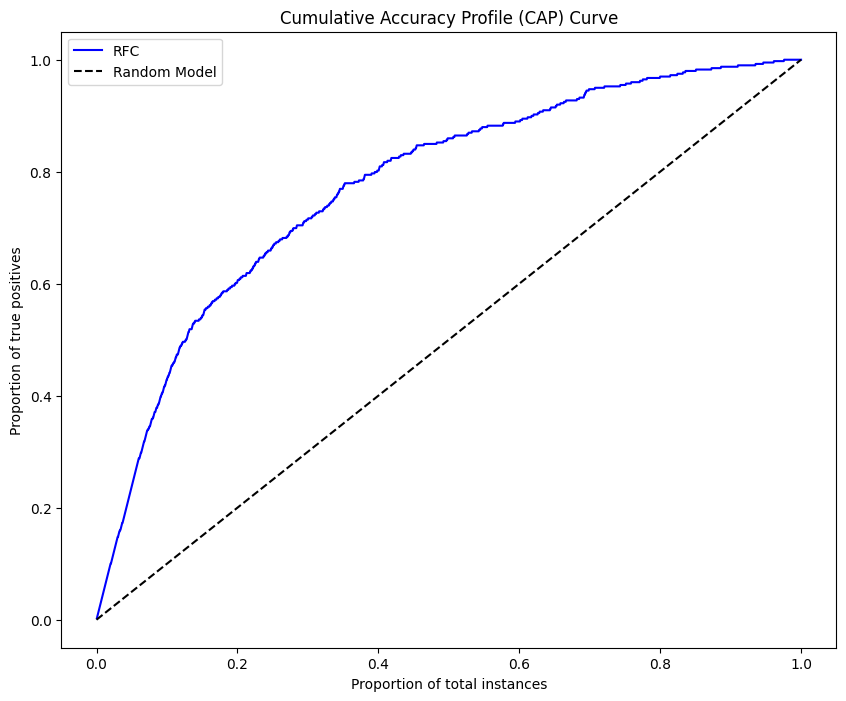

In [24]:
import numpy as np

y_probs_rfc = rfc.predict_proba(X_test_sc)[:, 1]  
sorted_indices_rfc = np.argsort(y_probs_rfc)[::-1]
y_true_sorted_rfc = y_test.values[sorted_indices_rfc] 
cumulative_true_positives_rfc = np.cumsum(y_true_sorted_rfc)
total_positives_rfc = np.sum(y_true_sorted_rfc)
x_rfc = np.arange(1, len(y_true_sorted_rfc) + 1) / len(y_true_sorted_rfc)
y_rfc = cumulative_true_positives_rfc / total_positives_rfc

plt.figure(figsize=(10, 8))
plt.plot(x_rfc, y_rfc, label='RFC', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Model', color='black')
plt.title('Cumulative Accuracy Profile (CAP) Curve')
plt.xlabel('Proportion of total instances')
plt.ylabel('Proportion of true positives')
plt.legend()
plt.show()